In [29]:
import laytr
import joblib
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors

In [2]:
som = joblib.load("/Users/english/code/adotto/benchmark/GIABTR_benchmark.6.26/adotto_TRv1.1_4mers.som")
s_map = joblib.load("/Users/english/code/adotto/benchmark/GIABTR_benchmark.6.26/adotto_TRv1.1_4mers.map")

In [8]:
benchmark = pd.read_csv("/Users/english/code/adotto/benchmark/GIABTR_benchmark.6.26/GIABTR.HG002.benchmark.regions.bed.gz",
                        sep='\t', names=['chrom', 'start', 'end', 'tier', 'repl', 'var_state', 'entropy', 'mat_ad', 'pat_ad'])
benchmark.set_index(['chrom', 'start', 'end'], inplace=True)

In [11]:
s_map_df = pd.DataFrame(s_map['map'], columns=["som_X", "som_Y"], 
                        index=pd.MultiIndex.from_tuples(s_map['index'], names=["chrom", "start", "end"]))

In [12]:
data = benchmark.join(s_map_df)

In [13]:
data.head()

tier      repl  var_state   entropy  mat_ad  pat_ad  \
chrom start  end                                                            
chr1  839177 839680  Tier1  TP_TP_TP         15  0.888568      42      42   
      840404 840466  Tier1  TN_TN_TN         14  0.765189       1       1   
      841888 841965  Tier1  TN_TN_TN          8  0.975809       0       0   
      844335 844427  Tier1  TN_TN_TN          8  0.997269       0       0   
      850622 850687  Tier1  TN_TN_TN         12  0.825237       0       0   

                     som_X  som_Y  
chrom start  end                   
chr1  839177 839680      3     22  
      840404 840466      3      0  
      841888 841965     10      1  
      844335 844427     10     22  
      850622 850687      4      7

In [14]:
total_neuron_count = s_map_df.groupby(['som_X', 'som_Y']).size()

In [15]:
benchmark_neuron_count = data.groupby(['som_X', 'som_Y']).size()

In [16]:
pct_of_neurons = benchmark_neuron_count / total_neuron_count

<Axes: >

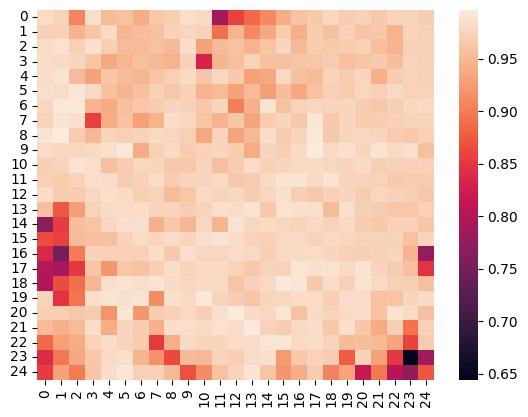

In [23]:
sb.heatmap(np.flip(pct_of_neurons.unstack().values.T))

In [40]:
(pct_of_neurons * 100).mean(), (pct_of_neurons * 100).std()

(95.97210526676689, 3.820627869623797)

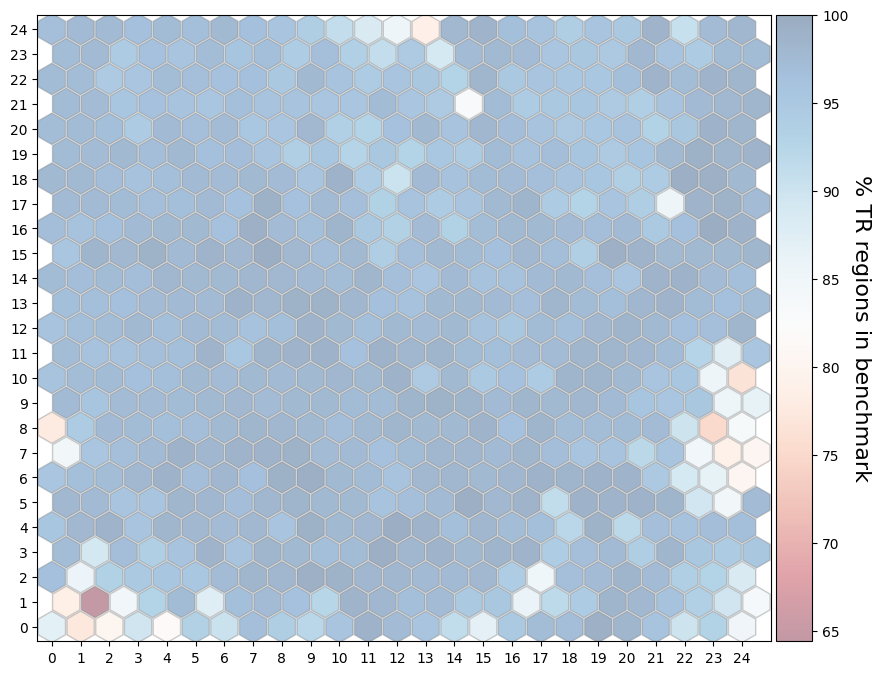

In [38]:
v = pct_of_neurons.unstack().values * 100
norm = colors.Normalize(vmin=v.min(), vmax=100)
p = laytr.make_hex_plot(som,
                       hue=v,
                       hue_label="% TR regions in benchmark", 
                       color_map=cm.RdBu,
                       color_norm=norm)
plt.savefig("Fig2A.pdf")